In [1]:
# important packages
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import math as m
import matplotlib.pyplot as plt
import os


# Figure 1

In [2]:
# 10 years IPEDS data for UNM
df = pd.read_csv('graduation_retention_graph.csv')

# manually enter the data provided by Office of Institutional analytics (UNM)
df['UNM_retention'] = [80, 79, 79, 77, 76, 73, 78, 79, 77, np.nan, np.nan]
df['UNM_fouryear'] = [29, 22, 19, 17, 16, 15, 15, 12, np.nan, np.nan, np.nan]
df['UNM_sixyear'] = [49, 45, 49, 48, 48, 46, np.nan, np.nan, np.nan, np.nan, np.nan]

In [3]:
# change working direcotry to put all the figures in one folder
os.chdir('C:\\Users\\rbishwakarma\\Desktop\\value_proposition_in_python\\value_proposition\\figures')

In [4]:
from mpl_toolkits.axisartist.axislines import SubplotZero

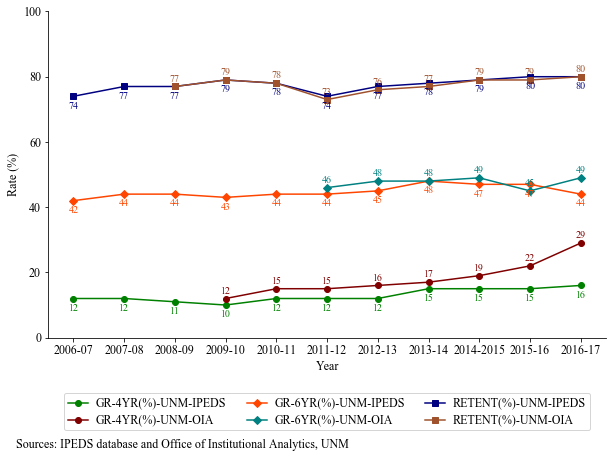

In [5]:
# Figure 1
fig, ax = plt.subplots(figsize=(10, 6))

# line 1
ax.plot(df['year'], df['Four_year'], color='green',  
               label='GR-4YR(%)-UNM-IPEDS',
            marker = 'o')
# annotes 
for x,y in zip(df['year'],df['Four_year']): # joining x and y coordinates
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(0,-12), # distance from text to points (x,y)
                 ha='center',
                fontfamily = 'Times New Roman',
                color = 'green') # horizontal alignment can be left, right or center

# line 2
ax.plot(df['year'], df['UNM_fouryear'], color='maroon',  
               label='GR-4YR(%)-UNM-OIA',
                     marker = 'o')
for x,y in zip(df['year'],df['UNM_fouryear']): # joining x and y coordinates
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center',
                fontfamily = 'Times New Roman',
                color = 'maroon') # horizontal alignment can be left, right or center

# line 3
ax.plot(df['year'], df['Six_year'], color='orangered',  
               label='GR-6YR(%)-UNM-IPEDS',
                     marker = 'D')

for x,y in zip(df['year'],df['Six_year']): 
    label = "{:.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,-12), 
                 ha='center',
                fontfamily = 'Times New Roman',
                color = 'orangered') 
    
# line 4
ax.plot(df['year'], df['UNM_sixyear'], color='teal',  
               label='GR-6YR(%)-UNM-OIA',
                     marker = 'D')

for x,y in zip(df['year'],df['UNM_sixyear']): 
    label = "{:.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 ha='center',
                fontfamily = 'Times New Roman',
                color = 'teal')

# line 5
ax.plot(df['year'], df['Retention'], color='navy',  
               label='RETENT(%)-UNM-IPEDS',
                     marker = 's')

for x,y in zip(df['year'],df['Retention']): 
    label = "{:.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,-12), 
                 ha='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# line 6
ax.plot(df['year'], df['UNM_retention'], color='sienna',  
               label='RETENT(%)-UNM-OIA',
                     marker = 's')

for x,y in zip(df['year'],df['UNM_retention']): 
    label = "{:.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 ha='center',
                fontfamily = 'Times New Roman',
                color = 'sienna')

# formatting
plt.xlabel('Year', fontsize = 12, family = 'Times New Roman')
plt.ylabel('Rate (%)', fontsize = 12, family = 'Times New Roman')

plt.xticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           ['2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-2015', '2015-16',
            '2016-17'],
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.yticks(fontsize = 12, 
           family = 'Times New Roman')

leg = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="lower center", 
           ncol=3)
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')


plt.ylim(0, 100) # changing axis limit

# adding note
note = 'Sources: IPEDS database and Office of Institutional Analytics, UNM'
plt.figtext(0.08, -0.13, note, wrap=True, horizontalalignment='left', fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure1.png', bbox_inches = 'tight')

plt.show()

# Figures 2-4

In [6]:
# additional packages
from sklearn import linear_model

In [7]:
os.chdir('C:\\Users\\rbishwakarma\\Desktop\\value_proposition_in_python\\value_proposition')
# data input
df = pd.read_stata('final.dta')
# keeping only the relevenat variables
df = df[['name', 'graduation_four', 'graduation_six', 'pell_grants', 'retention_rate']]

# missing value in four year graduation rate
df['graduation_four'] = df['graduation_four'].fillna((df['graduation_four'].mean()))

In [8]:
# to save all figures into one folder
os.chdir('C:\\Users\\rbishwakarma\\Desktop\\value_proposition_in_python\\value_proposition\\figures')

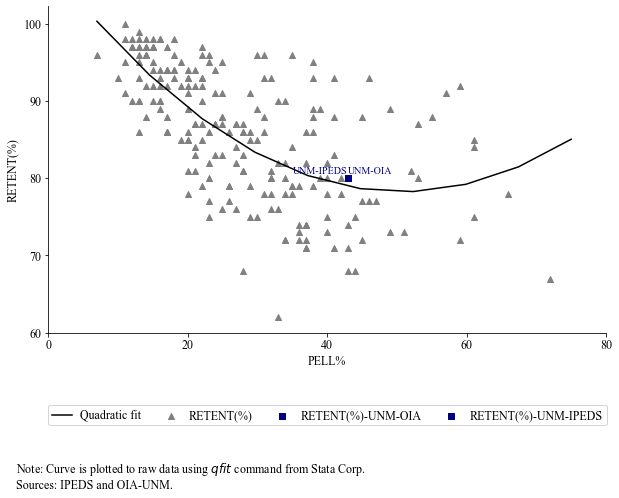

In [9]:
# calculate quadratic fit 
p2 = np.polyfit(df['pell_grants'], df['retention_rate'], 2)

fig, ax = plt.subplots(figsize=(10, 6))

# make graph
ax.scatter(df['pell_grants'], df['retention_rate'],
         marker = '^', color = 'grey', label = 'RETENT(%)')

# OIA data
ax.scatter(df['pell_grants'][118], 80, 
        marker = 's', color = 'navy', label = 'RETENT(%)-UNM-OIA')

plt.annotate('UNM-OIA',
                 (df['pell_grants'][118], 80), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='left',
                fontfamily = 'Times New Roman',
                color = 'navy')


# Highlight UNM-IPDES
ax.scatter(df['pell_grants'][118], 80, 
        marker = 's', color = 'navy', label = 'RETENT(%)-UNM-IPEDS')

plt.annotate('UNM-IPEDS',
                 (df['pell_grants'][118], 80), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='right',
                fontfamily = 'Times New Roman',
                color = 'navy')

xp = np.linspace(7,75,10) # Return evenly spaced numbers over a specified interval

ax.plot(xp,np.polyval(p2,xp),
         color = 'black', label = 'Quadratic fit')

# formatting - labels
plt.xlabel('PELL%', fontsize = 12, family = 'Times New Roman')
plt.ylabel('RETENT(%)', fontsize = 12, family = 'Times New Roman')

# axis
plt.xticks(np.arange(0, 80+1, 20), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.yticks(np.arange(60, 100+1, 10), 
           fontsize = 12, 
           family = 'Times New Roman')


# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="lower center", 
           ncol=4)
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# adding note
note = 'Note: Curve is plotted to raw data using $\it{qfit}$ command from Stata Corp. \n Sources: IPEDS and OIA-UNM.'
plt.figtext(0.08, -0.23, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure2.png', bbox_inches = 'tight')

plt.show()

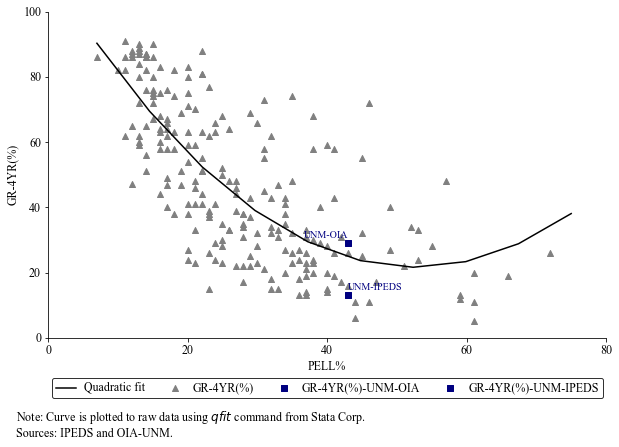

In [10]:
# calculate quartic fit of the polynomials

p2 = np.polyfit(df['pell_grants'], df['graduation_four'], 2)
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
ax.scatter(df['pell_grants'], df['graduation_four'],
         marker = '^', color = 'grey', label = 'GR-4YR(%)')

# OIA data
ax.scatter(df['pell_grants'][118], 29, 
        marker = 's', color = 'navy', label = 'GR-4YR(%)-UNM-OIA')

plt.annotate('UNM-OIA',
                 (df['pell_grants'][118], 29), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='right',
                fontfamily = 'Times New Roman',
                color = 'navy')


# Highlight UNM-IPDES
ax.scatter(df['pell_grants'][118], 13, 
        marker = 's', color = 'navy', label = 'GR-4YR(%)-UNM-IPEDS')

plt.annotate('UNM-IPEDS',
                 (df['pell_grants'][118], 13), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='left',
                fontfamily = 'Times New Roman',
                color = 'navy')

xp = np.linspace(7,75,10) # Return evenly spaced numbers over a specified interval

ax.plot(xp,np.polyval(p2,xp),
         color = 'black', label = 'Quadratic fit')

# formatting - labels
plt.xlabel('PELL%', fontsize = 12, family = 'Times New Roman')
plt.ylabel('GR-4YR(%)', fontsize = 12, family = 'Times New Roman')

# axis
plt.xticks(np.arange(0, 80+1, 20), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.yticks(np.arange(0, 100+1, 20), 
           fontsize = 12, 
           family = 'Times New Roman')


# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", 
           ncol=4, edgecolor="black")
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# adding note
note = 'Note: Curve is plotted to raw data using $\it{qfit}$ command from Stata Corp. \n Sources: IPEDS and OIA-UNM.'
plt.figtext(0.08, -0.10, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure3.png', bbox_inches = 'tight')

plt.show()

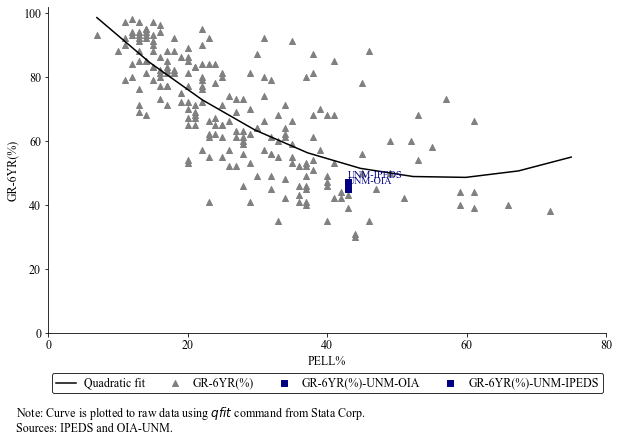

In [11]:
# calculate quartic fit of the polynomials

p2 = np.polyfit(df['pell_grants'], df['graduation_six'], 2)
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
ax.scatter(df['pell_grants'], df['graduation_six'],
         marker = '^', color = 'grey', label = 'GR-6YR(%)')

# OIA data
ax.scatter(df['pell_grants'][118], 45, 
        marker = 's', color = 'navy', label = 'GR-6YR(%)-UNM-OIA')

plt.annotate('UNM-OIA',
                 (df['pell_grants'][118], 45), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='left',
                fontfamily = 'Times New Roman',
                color = 'navy')


# Highlight UNM-IPDES
ax.scatter(df['pell_grants'][118], 47, 
        marker = 's', color = 'navy', label = 'GR-6YR(%)-UNM-IPEDS')

plt.annotate('UNM-IPEDS',
                 (df['pell_grants'][118], 47), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='left',
                fontfamily = 'Times New Roman',
                color = 'navy')

xp = np.linspace(7,75,10) # Return evenly spaced numbers over a specified interval

ax.plot(xp,np.polyval(p2,xp),
         color = 'black', label = 'Quadratic fit')

# formatting - labels
plt.xlabel('PELL%', fontsize = 12, family = 'Times New Roman')
plt.ylabel('GR-6YR(%)', fontsize = 12, family = 'Times New Roman')

# axis
plt.xticks(np.arange(0, 80+1, 20), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.yticks(np.arange(0, 100+1, 20), 
           fontsize = 12, 
           family = 'Times New Roman')


# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", 
           ncol=4, edgecolor="black")
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# adding note
note = 'Note: Curve is plotted to raw data using $\it{qfit}$ command from Stata Corp. \n Sources: IPEDS and OIA-UNM.'
plt.figtext(0.08, -0.10, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure4.png', bbox_inches = 'tight')

plt.show()